In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
## Importing required modules\librearies

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import math
import time
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
## Original PIMA Indian dataset

originalDf = pd.read_csv('/content/drive/MyDrive/Notes/Final Year Project/datasets_14370_19291_pima-indians-diabetes.csv')

originalDf.columns = ['preg', 'glu', 'BP', 'skinTh', 'insulin', 'BMI', 'diaPedFun', 'age', 'class']

originalDf

,preg,glu,BP,skinTh,insulin,BMI,diaPedFun,age,class
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


In [4]:
## Function to print countplot bar count

def plotBarCount(x) :
  for p in x.patches:
    x.annotate('{}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+15))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


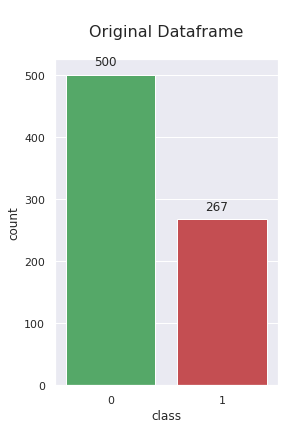

In [5]:
# Number of diabetic and non-diabetic data points in the original dataset

sns.set()

plt.figure(figsize=(4,6))
ax = sns.countplot(originalDf['class'], saturation=1, palette=['g','r'])
plt.title('\nOriginal Dataframe\n', fontsize=16)
plotBarCount(ax)

In [6]:
# Number of diabetic and non-diabetic data points in the original dataset

originalDf['class'].value_counts()

0    500
1    267
Name: class, dtype: int64

In [7]:
## Preparing dataset for clustering and classification

dfCopy = originalDf.copy()
del dfCopy['class']

# Normalizing the data using MminMax scaler
scaler = MinMaxScaler()
scaler.fit(dfCopy)
X_scaled = scaler.transform(dfCopy)

df = pd.DataFrame(X_scaled)
df.columns = ['preg',	'glu',	'BP',	'skinTh',	'insulin',	'BMI',	'diaPedFun',	'age']

df

,preg,glu,BP,skinTh,insulin,BMI,diaPedFun,age
0,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
1,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
2,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
3,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000
4,0.294118,0.582915,0.606557,0.000000,0.000000,0.381520,0.052519,0.150000
...,...,...,...,...,...,...,...,...
762,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000
763,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000
764,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000
765,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333


In [8]:
df.describe()

,preg,glu,BP,skinTh,insulin,BMI,diaPedFun,age
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,0.226014,0.607333,0.566407,0.207248,0.094449,0.476758,0.168093,0.203651
std,0.198287,0.160696,0.158755,0.161152,0.136268,0.117572,0.141545,0.195872
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.497487,0.508197,0.000000,0.000000,0.406855,0.070666,0.050000
50%,0.176471,0.587940,0.590164,0.232323,0.037825,0.476900,0.125107,0.133333
75%,0.352941,0.703518,0.655738,0.323232,0.150709,0.545455,0.233561,0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


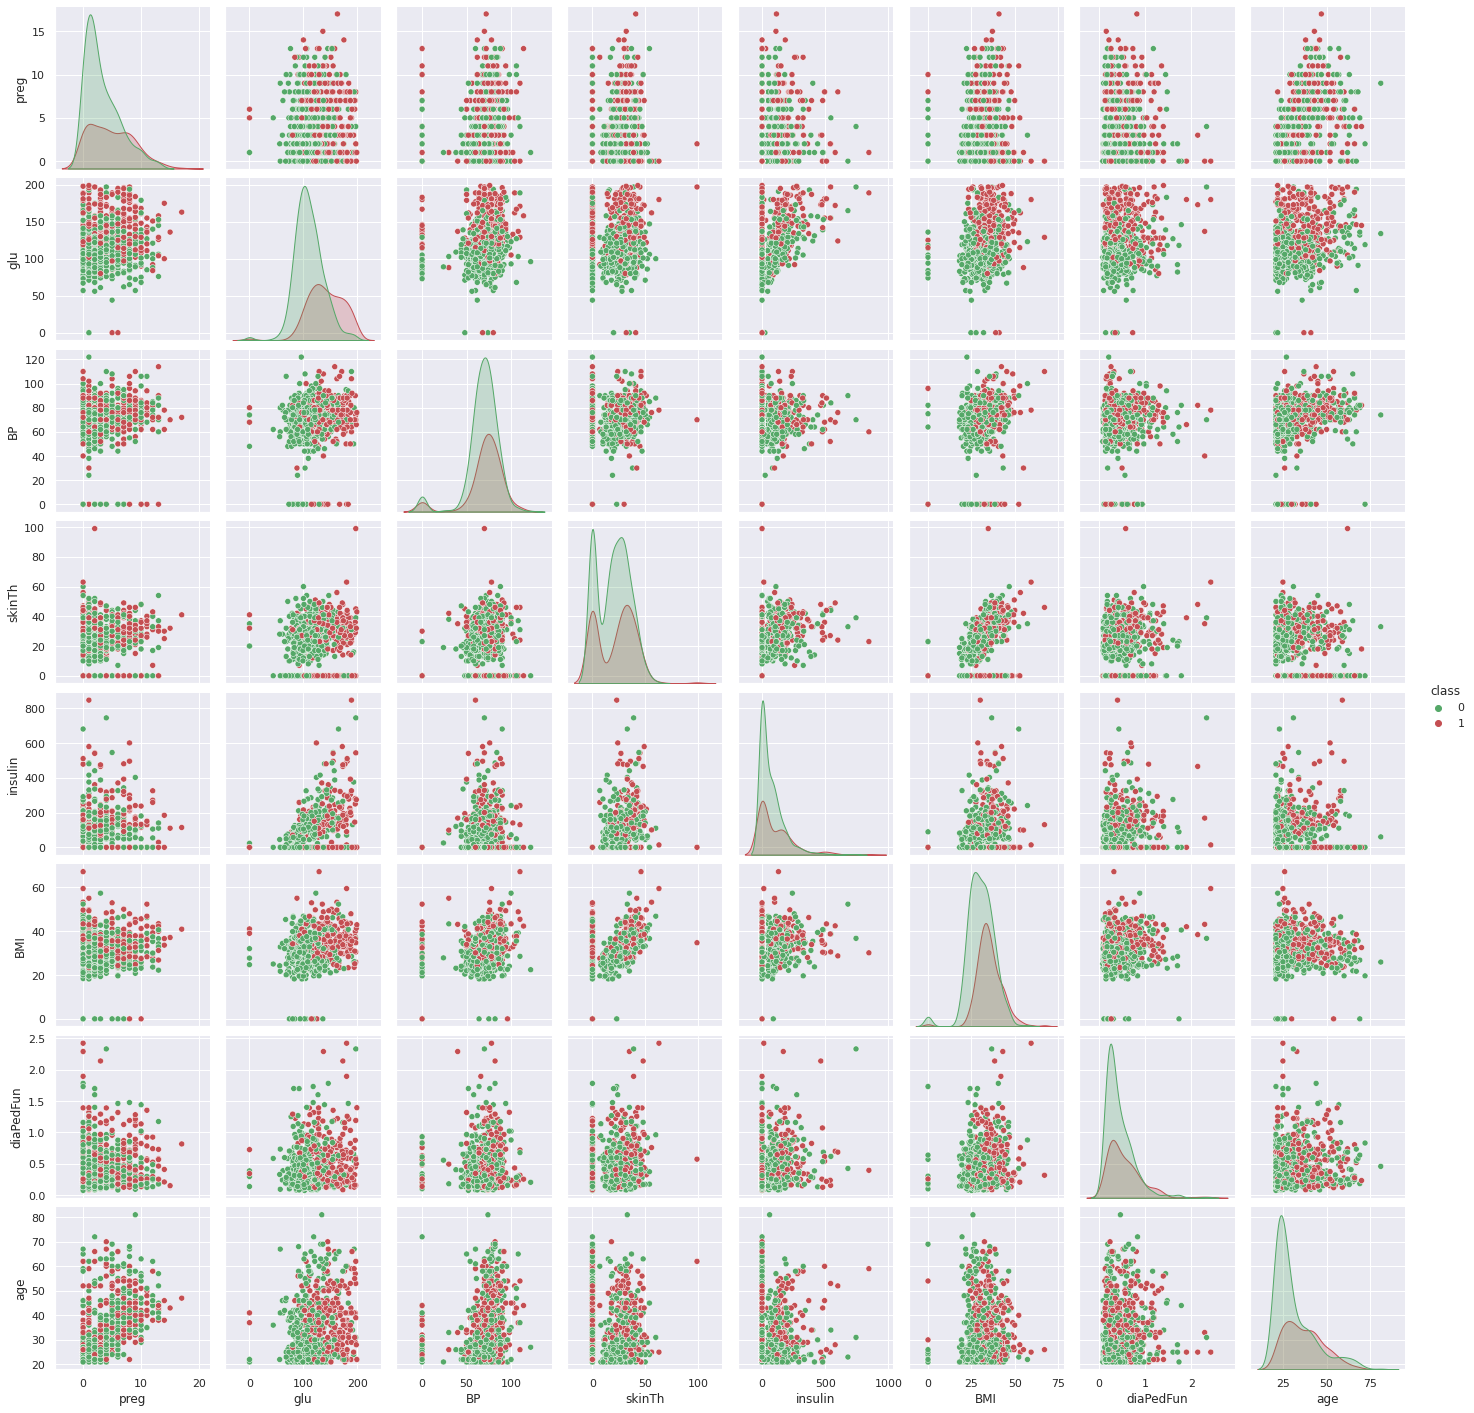

In [9]:
#pairplot to check the distribution of the data

sns.pairplot(data=originalDf, hue='class', diag_kind='kde', palette=['g','r'])
plt.show()

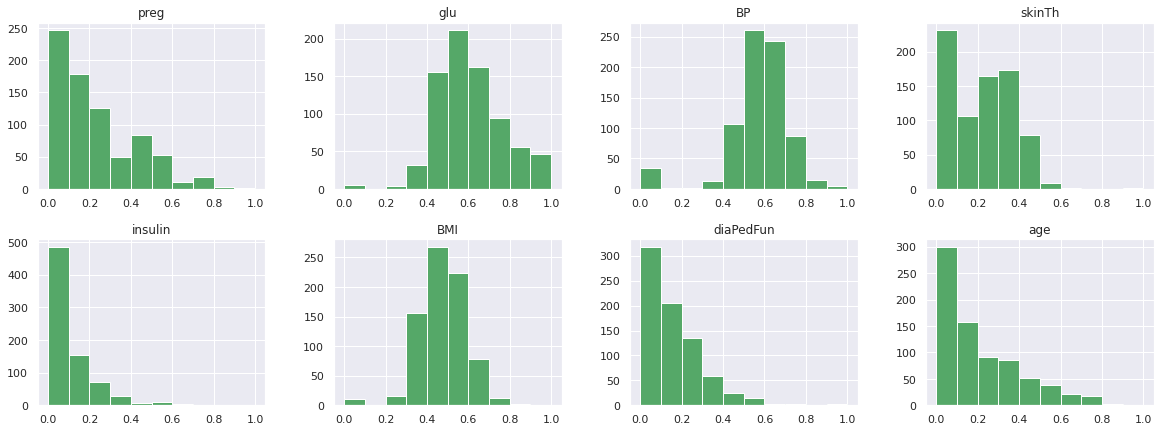

In [10]:
## Plotting a Histogram of the data

df.hist(figsize=(20,15), layout=[4,4], color='#55A868')
plt.show()

preg             AxesSubplot(0.125,0.71587;0.168478x0.16413)
glu           AxesSubplot(0.327174,0.71587;0.168478x0.16413)
BP            AxesSubplot(0.529348,0.71587;0.168478x0.16413)
skinTh        AxesSubplot(0.731522,0.71587;0.168478x0.16413)
insulin         AxesSubplot(0.125,0.518913;0.168478x0.16413)
BMI          AxesSubplot(0.327174,0.518913;0.168478x0.16413)
diaPedFun    AxesSubplot(0.529348,0.518913;0.168478x0.16413)
age          AxesSubplot(0.731522,0.518913;0.168478x0.16413)
dtype: object

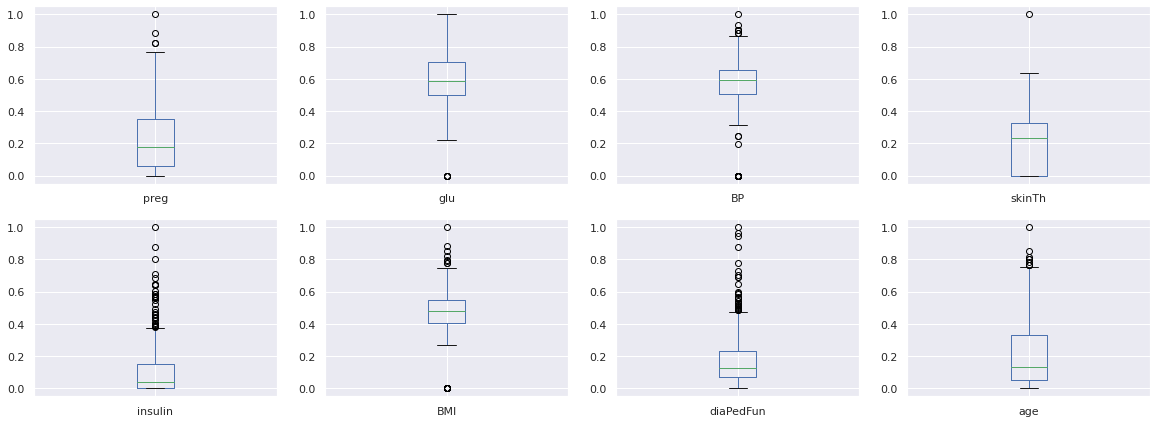

In [11]:
## BOXPLOT for checking the outliers
df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(20,15))

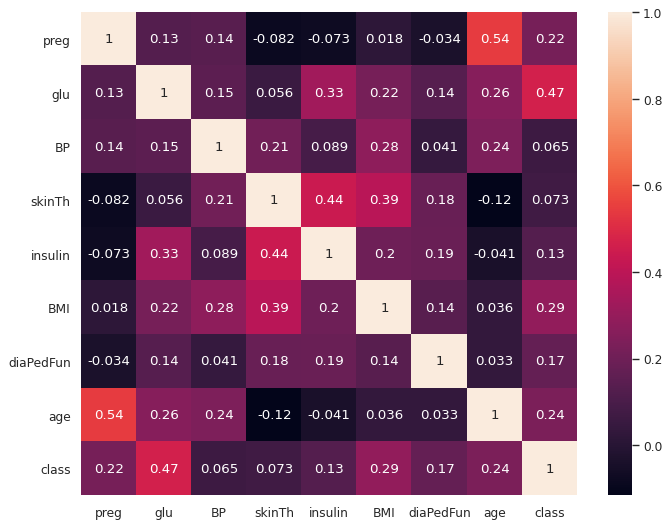

In [12]:
#### checking the correlation in matrix for variables using HEATMAP

plt.figure(figsize=(10,8), dpi=80)
sns.heatmap(originalDf.corr(), annot=True)

In [13]:
## Function to calculate Eucledian Distance

def dist(plist1, plist2):
  return math.sqrt( (plist1[0] - plist2[0])**2 + (plist1[1] - plist2[1])**2 + (plist1[2] - plist2[2])**2 + (plist1[3] - plist2[3])**2 + (plist1[4] - plist2[4])**2 + (plist1[5] - plist2[5])**2 + (plist1[6] - plist2[6])**2 + (plist1[7] - plist2[7])**2) 

In [14]:
begin = time.time();  #timer start

In [15]:
## To find Xmin data point ---> data point with minimumt distance from origin

origin = pd.Series([0,0,0,0,0,0,0,0])

rows, columns = df.shape

df['dFromOrigin'] = 0   ## Adding attribute/Column 'dFromOrigin' to the dataframe

for i in range (rows):
  df['dFromOrigin'].iloc[i] = dist(origin, df.iloc[i])   ## Calculating Eucledian distance

Xmin = df.dFromOrigin.min() ## Value of Xmin

XminRow = df[df['dFromOrigin'] == df.dFromOrigin.min()]  ## Xmin data point (row)

del XminRow['dFromOrigin']   ## Some waste management

XminRow   ## Displaying Xmin data point

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,preg,glu,BP,skinTh,insulin,BMI,diaPedFun,age
80,0.117647,0.371859,0.0,0.0,0.0,0.0,0.010248,0.016667


In [16]:
## To find Xmax data point   ----->   data point with maximum distance from Xmin data point

df['dFromXmin'] = 0

for i in range (rows):
  df['dFromXmin'].iloc[i] = dist(XminRow.iloc[0], df.iloc[i])

Xmax = df.dFromXmin.max()  ## Value of Xmax

XmaxRow = df[df['dFromXmin'] == df.dFromXmin.max()]

del XmaxRow['dFromOrigin']  ## Waste management
del XmaxRow['dFromXmin']   ## Waste management

XmaxRow

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,preg,glu,BP,skinTh,insulin,BMI,diaPedFun,age
227,0.235294,0.98995,0.57377,0.393939,0.879433,0.546945,0.961144,0.166667


In [17]:
## Distance of data points from Xmax data point 

df['dFromXmax'] = 0

for i in range (rows):
  df['dFromXmax'].iloc[i] = dist(XmaxRow.iloc[0], df.iloc[i])

df.head(2)


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,preg,glu,BP,skinTh,insulin,BMI,diaPedFun,age,dFromOrigin,dFromXmin,dFromXmax
0,0.058824,0.427136,0.540984,0.292929,0.0,0.396423,0.116567,0.166667,0.873437,0.758908,1.366949
1,0.470588,0.919598,0.524590,0.000000,0.0,0.347243,0.253629,0.183333,1.249330,0.952560,1.237763


In [18]:
## Forming Clusters

df['class'] = 0

for i in range (rows):
  if ( (df.dFromXmin.iloc[i] < df.dFromXmax.iloc[i]) ) :
    df['class'].iloc[i] = 0
  else : df['class'].iloc[i] = 1

df

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,preg,glu,BP,skinTh,insulin,BMI,diaPedFun,age,dFromOrigin,dFromXmin,dFromXmax,class
0,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.873437,0.758908,1.366949,0
1,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.249330,0.952560,1.237763,0
2,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.859815,0.737935,1.356315,0
3,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.445305,1.305142,0.826101,1
4,0.294118,0.582915,0.606557,0.000000,0.000000,0.381520,0.052519,0.150000,0.982355,0.780205,1.397156,0
...,...,...,...,...,...,...,...,...,...,...,...,...
762,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,1.415632,1.271415,1.396105,0
763,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,1.056683,0.883077,1.292165,0
764,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,1.027647,0.825036,1.245133,0
765,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1.024024,0.836405,1.374513,0


In [19]:
end = time.time(); #end time

print(f"Total runtime of the program is {end - begin} seconds.")

Total runtime of the program is 1.0235950946807861 seconds.


In [20]:
## class 1

df[df['class'] == 1].shape

(104, 12)

In [21]:
## class 0

df[df['class'] == 0].shape

(663, 12)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


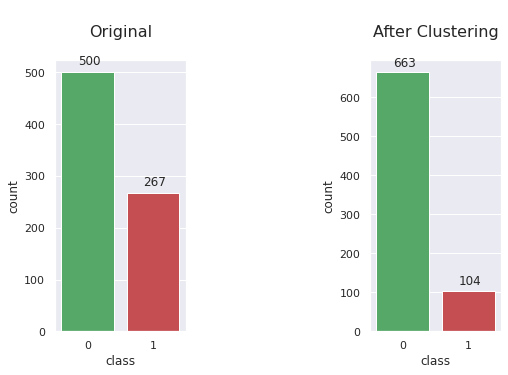

In [22]:
plt.figure(figsize=(8,5))

## Plot 1
plt.subplot(1,3,1)
p1 = sns.countplot(originalDf['class'], saturation=1, palette=['g','r'])
plt.title('\nOriginal\n', fontsize=16)
plotBarCount(p1)

## Plot 2
plt.subplot(1,3,3)
p2 = sns.countplot(df['class'], saturation=1, palette=['g','r'])
plt.title('\nAfter Clustering\n', fontsize=16)
plotBarCount(p2)

In [23]:
from sklearn.naive_bayes import GaussianNB
 
df2 = df.copy()

## some formatting
del df2['dFromOrigin']
del df2['dFromXmin']
del df2['dFromXmax']

In [24]:
df3 = df2.copy()
df4 = df2.copy()
del df3['class']
df3['class'] = originalDf['class']
df3

,preg,glu,BP,skinTh,insulin,BMI,diaPedFun,age,class
0,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0
1,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1
2,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0
3,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1
4,0.294118,0.582915,0.606557,0.000000,0.000000,0.381520,0.052519,0.150000,0
...,...,...,...,...,...,...,...,...,...
762,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0
763,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0
764,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0
765,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1


In [25]:
 ## Eliminating wrongly clustered tuples
 
for i in range(rows):
  if (df2['class'].iloc[i] != df3['class'].iloc[i]):
    df4 = df4.drop(labels=i, axis=0)
    
df4

,preg,glu,BP,skinTh,insulin,BMI,diaPedFun,age,class
0,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0
2,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0
3,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1
4,0.294118,0.582915,0.606557,0.000000,0.000000,0.381520,0.052519,0.150000,0
6,0.588235,0.577889,0.000000,0.000000,0.000000,0.526080,0.023911,0.133333,0
...,...,...,...,...,...,...,...,...,...
761,0.529412,0.447236,0.508197,0.000000,0.000000,0.335320,0.027327,0.200000,0
762,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0
763,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0
764,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0


preg             AxesSubplot(0.125,0.71587;0.168478x0.16413)
glu           AxesSubplot(0.327174,0.71587;0.168478x0.16413)
BP            AxesSubplot(0.529348,0.71587;0.168478x0.16413)
skinTh        AxesSubplot(0.731522,0.71587;0.168478x0.16413)
insulin         AxesSubplot(0.125,0.518913;0.168478x0.16413)
BMI          AxesSubplot(0.327174,0.518913;0.168478x0.16413)
diaPedFun    AxesSubplot(0.529348,0.518913;0.168478x0.16413)
age          AxesSubplot(0.731522,0.518913;0.168478x0.16413)
class           AxesSubplot(0.125,0.321957;0.168478x0.16413)
dtype: object

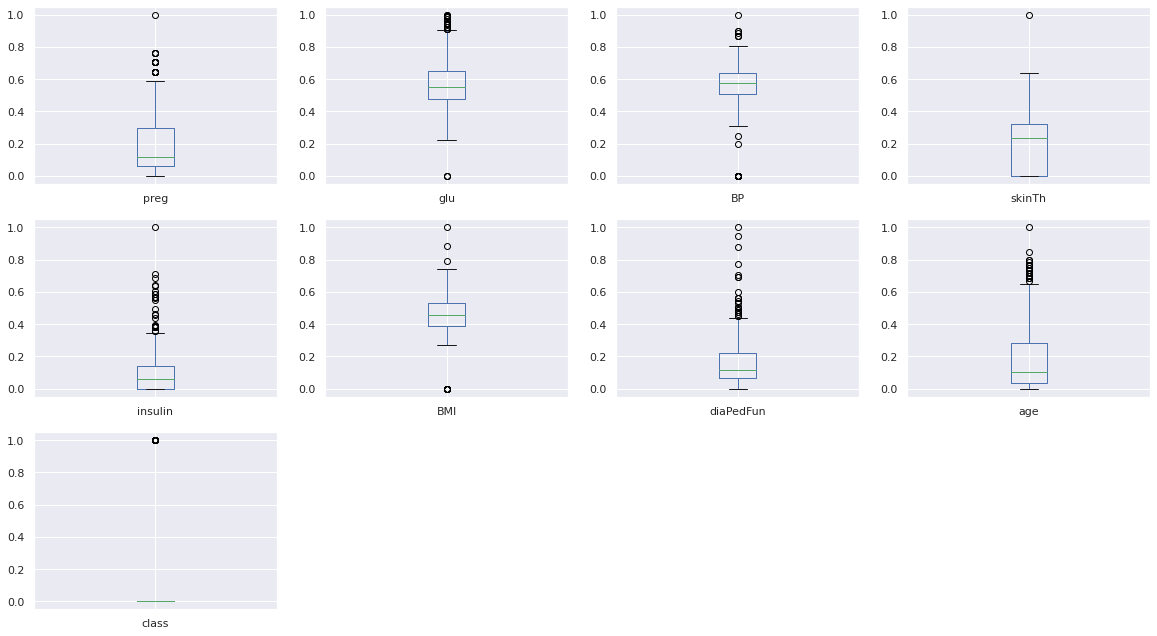

In [26]:
## BOXPLOT for checking the outliers
df4.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(20,15))

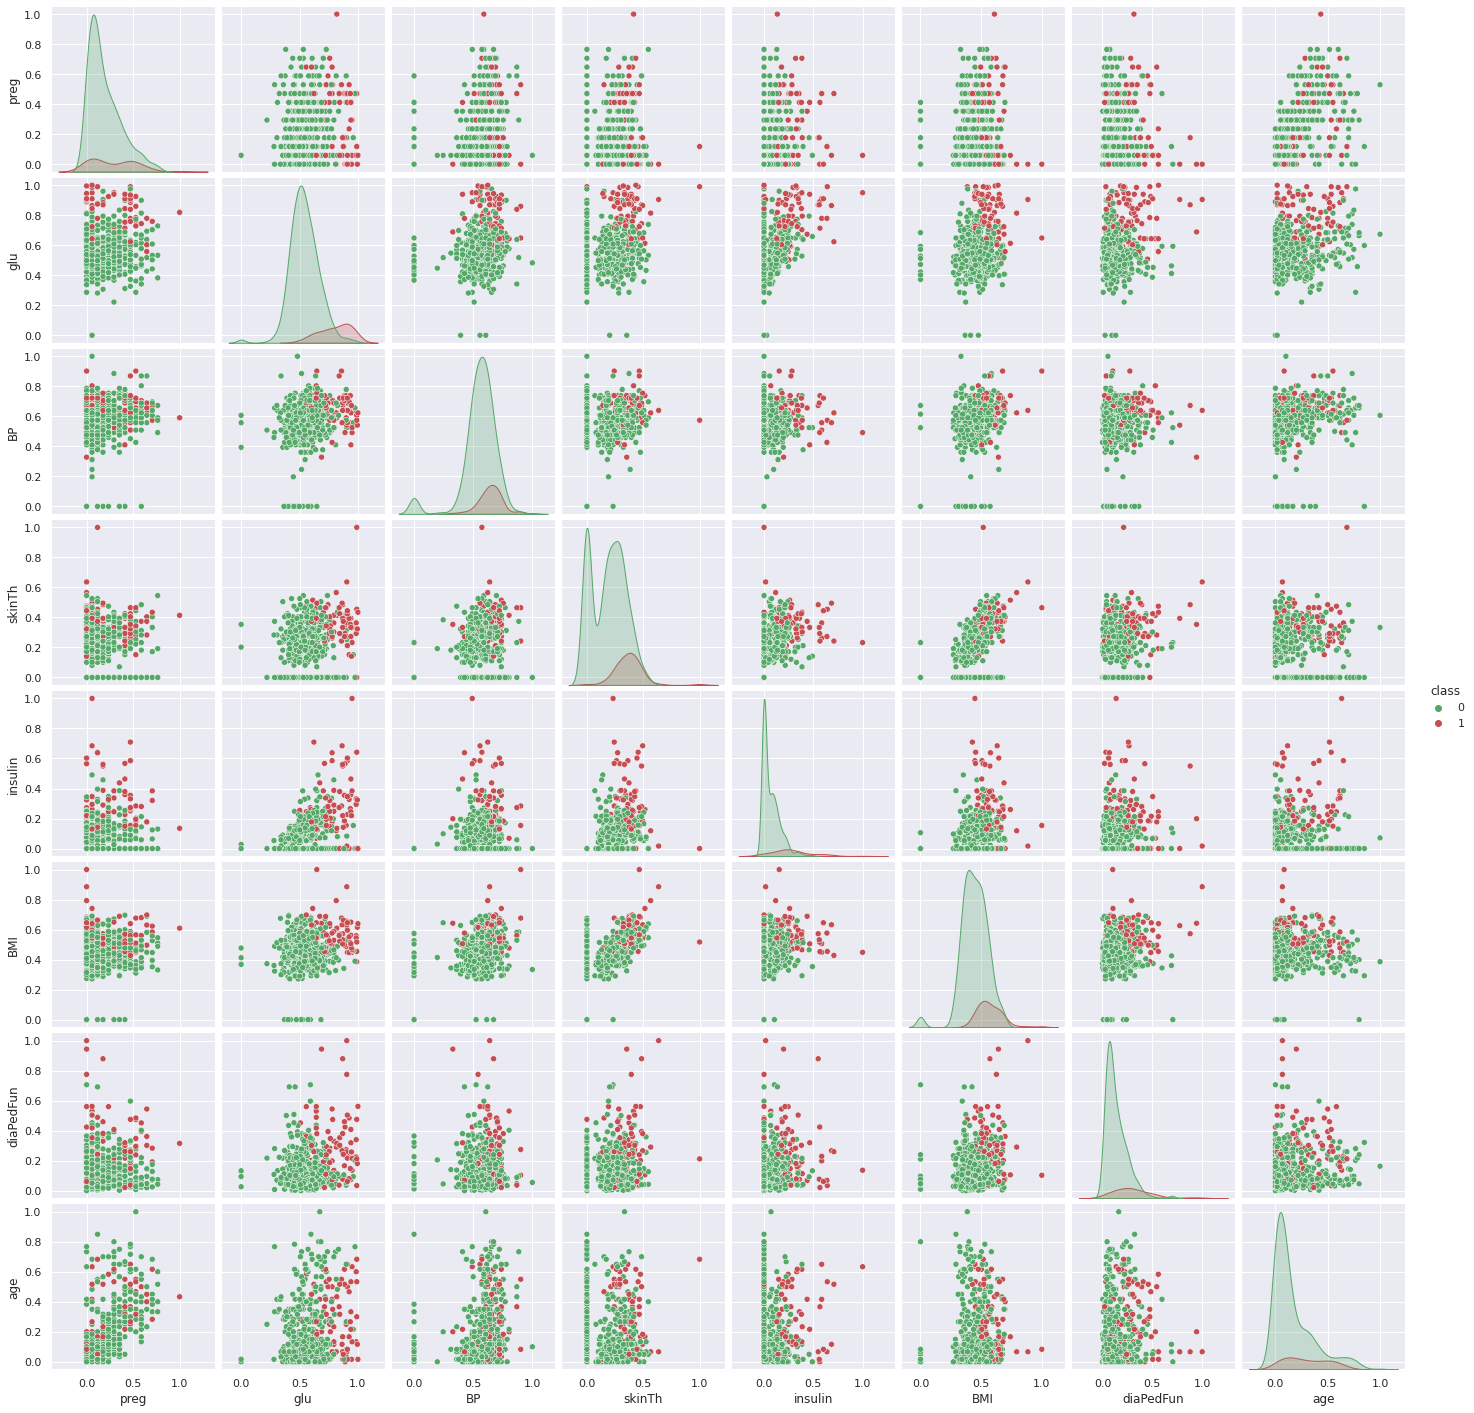

In [27]:
#pairplot to check the distribution of the data

sns.pairplot(data=df4, hue='class', diag_kind='kde', palette=['g','r'])
plt.show()

In [28]:
## Class 0

df4[df4['class'] == 0].shape

(469, 9)

In [29]:
##Class 1

df4[df4['class'] == 1].shape

(73, 9)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


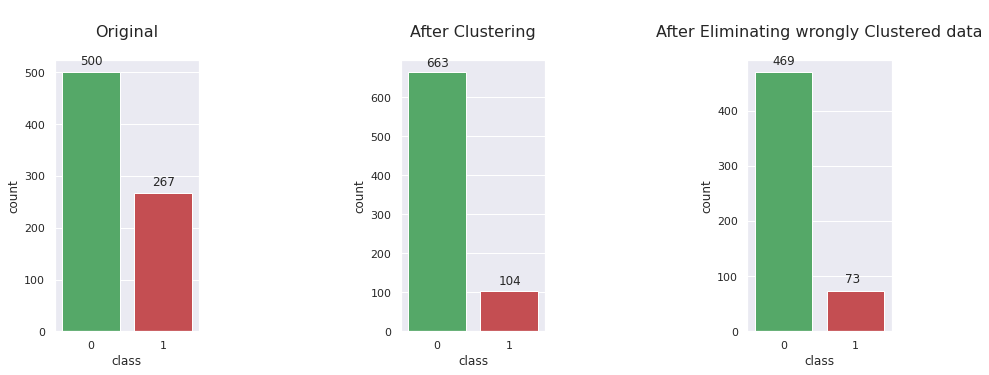

In [30]:
plt.figure(figsize=(15,5))

## Plot 1
plt.subplot(1,5,1)
p1 = sns.countplot(originalDf['class'], saturation=1, palette=['g','r'])
plt.title('\nOriginal\n', fontsize=16)
plotBarCount(p1)

## Plot 2
plt.subplot(1,5,3)
p2 = sns.countplot(df2['class'], saturation=1, palette=['g','r'])
plt.title('\nAfter Clustering\n', fontsize=16)
plotBarCount(p2)

## Plot 3
plt.subplot(1,5,5)
p3 = sns.countplot(df4['class'], saturation=1, palette=['g','r'])
plt.title('\nAfter Eliminating wrongly Clustered data\n', fontsize=16)
plotBarCount(p3)

In [31]:
# Splitting test and train datasets

from sklearn.model_selection import train_test_split

inputs = df4.drop('class', axis=1)
target = df4['class']

X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.3, shuffle=False)

# X_train  ---> Training data without class label
# y_train  ---> Training class labels of X_train

# X_test  ---> Testing data without class label
# y_test  ---> Testing class labels of X_test

In [32]:
## Dimentions of X_train, X_test, y_train, y_test

print("X_train:", X_train.shape, '\tX_test:', X_test.shape, "\ty_train:", y_train.shape, '\ty_test:', X_test.shape)

X_train: (379, 8) 	X_test: (163, 8) 	y_train: (379,) 	y_test: (163, 8)


In [33]:
## Importing GaussianNB model

from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

In [34]:
## Building the model

model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [35]:
## Model accuracy

model.score(X_test,y_test)

0.9693251533742331

In [36]:
## Selecting a small part of X_test (first 10 in this case)

X_test[0:10]

,preg,glu,BP,skinTh,insulin,BMI,diaPedFun,age
543,0.058824,0.442211,0.639344,0.292929,0.089835,0.476900,0.122545,0.133333
544,0.470588,0.934673,0.737705,0.353535,0.265957,0.514158,0.147310,0.266667
545,0.294118,0.939698,0.622951,0.272727,0.244681,0.649776,0.408198,0.533333
546,0.235294,0.658291,0.557377,0.212121,0.196217,0.493294,0.035013,0.116667
547,0.058824,0.824121,0.672131,0.434343,0.079196,0.488823,0.112297,0.483333
549,0.058824,0.582915,0.573770,0.282828,0.000000,0.408346,0.053800,0.000000
550,0.176471,0.422111,0.557377,0.303030,0.125296,0.475410,0.219044,0.066667
551,0.352941,0.572864,0.721311,0.000000,0.000000,0.414307,0.072161,0.750000
552,0.058824,0.442211,0.508197,0.242424,0.052009,0.445604,0.146883,0.033333
553,0.058824,0.422111,0.524590,0.232323,0.135934,0.549925,0.167805,0.116667


In [37]:
## Selecting a small part of y_test (first 10 in this case)


y_test[0:10]

543    0
544    1
545    1
546    0
547    0
549    0
550    0
551    0
552    0
553    0
Name: class, dtype: int64

In [38]:
 ## Predicting class labels of given input data
 
 model.predict(X_test[0:10])

array([0, 1, 1, 0, 1, 0, 0, 0, 0, 0])

In [39]:
model.predict_proba(X_test[:10])

array([[9.99600514e-01, 3.99485888e-04],
       [3.67024670e-03, 9.96329753e-01],
       [1.56186333e-04, 9.99843814e-01],
       [9.86746602e-01, 1.32533979e-02],
       [4.73197585e-01, 5.26802415e-01],
       [9.99584508e-01, 4.15491844e-04],
       [9.99564976e-01, 4.35024085e-04],
       [9.99891625e-01, 1.08375414e-04],
       [9.99964533e-01, 3.54668299e-05],
       [9.99738697e-01, 2.61302601e-04]])

In [40]:
truth = y_test
prediction =  model.predict(X_test)

print(classification_report(truth, prediction))

# The precision will be "how many are correctly classified among that class" -----> minimizing false psitives
# The recall means "how many of this class you find over the whole number of element of this class" -----> minimizing false negatives
# The f1-score is the harmonic mean between precision & recall
# The support is the number of occurence of the given class in your dataset (so you have 24 of class 0 and 139 of class 1)

# Macro-averaged: all classes equally contribute to the average
# Weighted-average: each classes's contribution to the average is weighted by its size

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       139
           1       0.83      1.00      0.91        24

    accuracy                           0.97       163
   macro avg       0.91      0.98      0.94       163
weighted avg       0.97      0.97      0.97       163



In [41]:
# plot_confusion_matrix(model, X_test, y_test)

In [42]:
# Source code credit for this function: https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823

import seaborn as sns

def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names,)
    fig = plt.figure(figsize=figsize)

    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=90, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', fontsize=fontsize)
    plt.title('\nConfusion Matrix\n', fontsize=24)
    plt.ylabel('\nActual\n', fontsize=16)
    plt.xlabel('\nPrediction\n', fontsize=16)

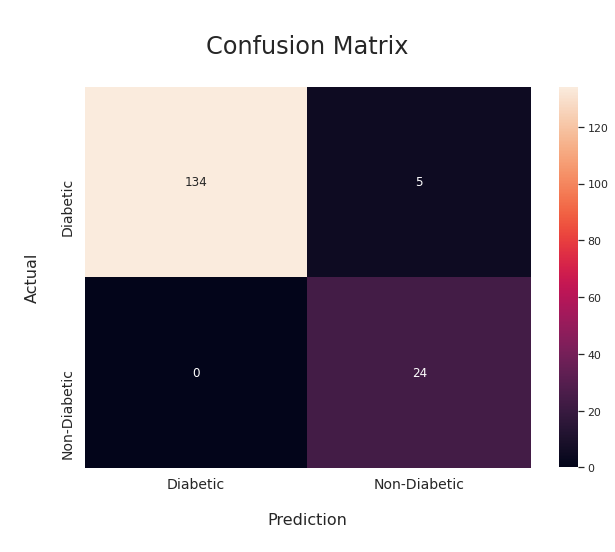

In [43]:
cm = confusion_matrix(truth,prediction)
print_confusion_matrix(cm,["Diabetic","Non-Diabetic"])

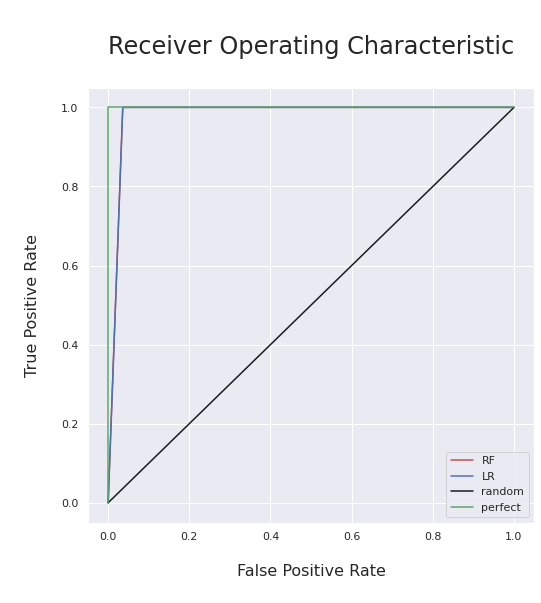

In [44]:
from sklearn.metrics import roc_curve

fpr_RF, tpr_RF, thresholds_RF = roc_curve(truth, prediction)
fpr_LR, tpr_LR, thresholds_LR = roc_curve(truth, prediction)

plt.figure(figsize=(8,8))
plt.plot(fpr_RF, tpr_RF,'r-',label = 'RF')
plt.plot(fpr_LR,tpr_LR,'b-', label= 'LR')
plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('\nFalse Positive Rate\n', fontsize=16)
plt.ylabel('\nTrue Positive Rate\n', fontsize=16)
plt.title('\nReceiver Operating Characteristic\n', fontsize=24)
plt.show()

Text(0.5, 0, 'Feature Importance')

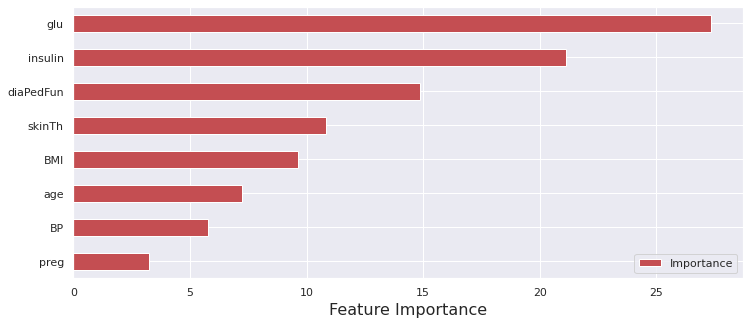

In [45]:
## Checking for top 3 most important features in the given dataset

from sklearn.ensemble import RandomForestClassifier
randomForestModel = RandomForestClassifier(criterion = 'gini', n_estimators = 25, random_state = 1)
randomForestModel.fit(X_train, y_train)

Importance = pd.DataFrame({'Importance':randomForestModel.feature_importances_*100}, index=X_train.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', figsize=(12,5))
plt.xlabel('Feature Importance', fontsize=16)
# plt.gca().legend_ = None

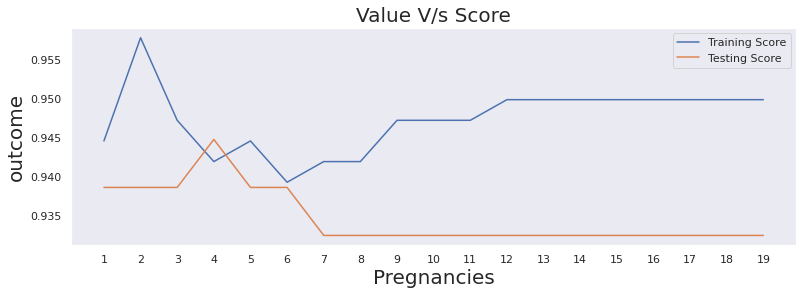


Best score is 0.9447852760736196 with K = 4


In [46]:
from sklearn.neighbors import KNeighborsClassifier

neig = np.arange(1, 20)
train_score_knn=[]
test_score_knn=[]
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=12, p=i, metric='minkowski')
    knn.fit(X_train, y_train)
    train_score_knn.append(knn.score(X_train, y_train))
    test_score_knn.append(knn.score(X_test, y_test))


plt.figure(figsize=[13,4])
plt.plot(neig, train_score_knn, label = 'Training Score')
plt.plot(neig, test_score_knn, label = 'Testing Score')
plt.legend()
plt.title('Value V/s Score',fontsize=20)
plt.xlabel('Pregnancies',fontsize=20)
plt.ylabel('outcome',fontsize=20)
plt.xticks(neig)
plt.grid()
plt.show()
print("\nBest score is {} with K = {}".format(np.max(test_score_knn),1+test_score_knn.index(np.max(test_score_knn))))



---



---



---

Testing Performance with new Data

---



---



---


In [47]:
newDf = pd.read_csv('/content/drive/MyDrive/Notes/Final Year Project/DiabetesDataSet_2.csv')

newDf

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


In [48]:
## Using minMax Scaler
scaler = MinMaxScaler()

# fit using the train set
scaler.fit(newDf)

#transform the test set
X_scaled = scaler.transform(newDf)

newDf = pd.DataFrame(X_scaled)

newDf.columns = ['preg',	'glu',	'BP',	'skinTh',	'insulin',	'BMI',	'diaPedFun',	'age', 'class']

newDf

,preg,glu,BP,skinTh,insulin,BMI,diaPedFun,age,class
0,0.117647,0.693467,0.508197,0.318182,0.000000,0.416873,0.020922,0.433333,1.0
1,0.000000,0.422111,0.672131,0.281818,0.168011,0.473945,0.066183,0.033333,0.0
2,0.000000,0.728643,0.000000,0.000000,0.000000,0.548387,0.235696,0.166667,1.0
3,0.000000,0.678392,0.557377,0.381818,0.336022,0.524814,0.122545,0.050000,1.0
4,0.058824,0.698492,0.508197,0.372727,0.645161,0.504963,0.195559,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
1995,0.117647,0.376884,0.524590,0.218182,0.073925,0.368486,0.124680,0.200000,0.0
1996,0.470588,0.899497,0.590164,0.381818,0.174731,0.405707,0.273698,0.250000,1.0
1997,0.352941,0.427136,0.639344,0.000000,0.000000,0.387097,0.129804,0.350000,0.0
1998,0.000000,0.648241,0.901639,0.418182,0.174731,0.832506,0.102904,0.083333,1.0


In [49]:
originalClassLabels = newDf['class']

In [50]:
originalClassLabels.shape

(2000,)

In [51]:
testingData = newDf.drop(columns=['class'])
testingData

,preg,glu,BP,skinTh,insulin,BMI,diaPedFun,age
0,0.117647,0.693467,0.508197,0.318182,0.000000,0.416873,0.020922,0.433333
1,0.000000,0.422111,0.672131,0.281818,0.168011,0.473945,0.066183,0.033333
2,0.000000,0.728643,0.000000,0.000000,0.000000,0.548387,0.235696,0.166667
3,0.000000,0.678392,0.557377,0.381818,0.336022,0.524814,0.122545,0.050000
4,0.058824,0.698492,0.508197,0.372727,0.645161,0.504963,0.195559,0.000000
...,...,...,...,...,...,...,...,...
1995,0.117647,0.376884,0.524590,0.218182,0.073925,0.368486,0.124680,0.200000
1996,0.470588,0.899497,0.590164,0.381818,0.174731,0.405707,0.273698,0.250000
1997,0.352941,0.427136,0.639344,0.000000,0.000000,0.387097,0.129804,0.350000
1998,0.000000,0.648241,0.901639,0.418182,0.174731,0.832506,0.102904,0.083333


In [52]:
 predictedLabels = model.predict(testingData)

In [53]:
print(classification_report(originalClassLabels, predictedLabels))

              precision    recall  f1-score   support

         0.0       0.73      0.91      0.81      1316
         1.0       0.66      0.34      0.45       684

    accuracy                           0.71      2000
   macro avg       0.69      0.62      0.63      2000
weighted avg       0.70      0.71      0.68      2000



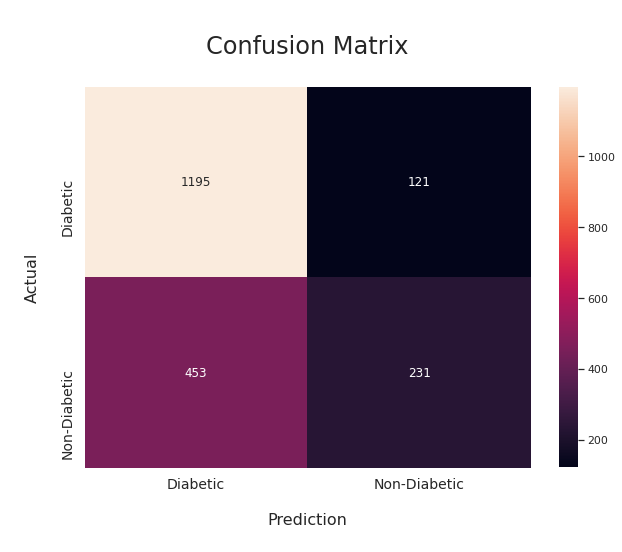

In [54]:
cm2 = confusion_matrix(originalClassLabels,predictedLabels)
print_confusion_matrix(cm2,["Diabetic","Non-Diabetic"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


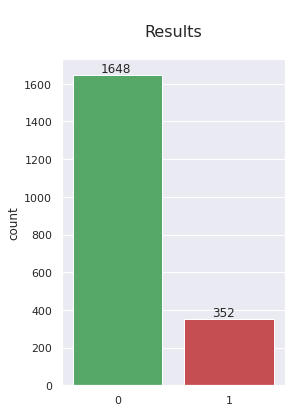

In [55]:
plt.figure(figsize=(4,6))

## Plot 1
plt.subplot(1,1,1)
p1 = sns.countplot( predictedLabels, saturation=1, palette=['g','r'])
plt.title('\nResults\n', fontsize=16)
plotBarCount(p1)